In [54]:
# Receiver Operating Characterstics and Area under curve

In [5]:
%config Completer.use_jedi = False

In [2]:
# credit : https://machinelearningmastery.com/ 

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)# generate a no skill prediction (majority class)

no_model = [0 for _ in range(len(y_test))]
# fit a model


In [3]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities


LogisticRegression()

In [5]:
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only


In [6]:
model.classes_

array([0, 1])

In [15]:
lr_probs.shape,y_test.shape

((330,), (330,))

In [14]:
#roc_auc_score(testy, lr_probs)
#lr_probs

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.90223


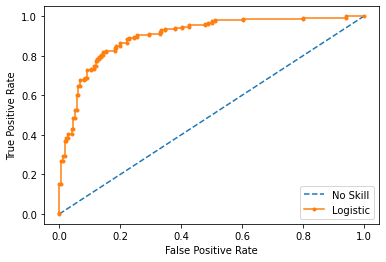

In [17]:
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, no_model)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.5f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_model)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


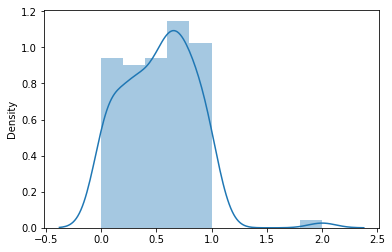

In [23]:
import seaborn as sns
sns.distplot(_.T, bins =10)

In [24]:
lr_probs.shape, testy.shape


((500,), (500,))

In [37]:
tpr, fpr, thre = roc_curve(testy, lr_probs)

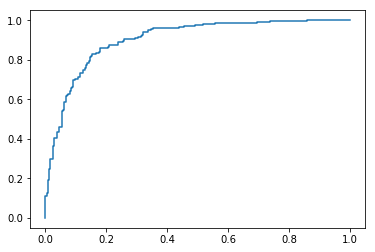

In [40]:
plt.plot(tpr,fpr,)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
%config Completer.use_jedi = False

In [45]:
len(thre)

122

C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


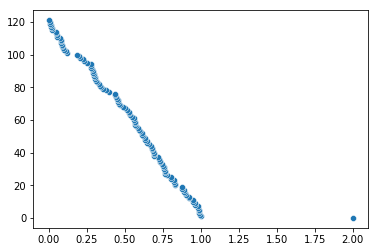

In [46]:
sns.scatterplot(thre, range(len(thre)))

C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


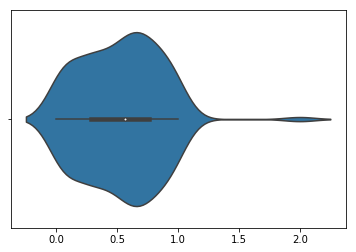

In [53]:
sns.violinplot(thre)

In [51]:
import pandas as pd

In [52]:
pd.DataFrame(thre).describe()

,0
count,122.000000
mean,0.527110
std,0.327902
min,0.000081
25%,0.283833
50%,0.560849
75%,0.760835
max,1.999811


## 1. Threshold is third parameter in 'roc_curve' function
## 2.  'roc_curve' needs 'y_test' and 'y_pred_prob' as parameter.
## 3.  Threshold is inbuild by the function and varies from 0 to 1 ( having one value as 2). see graph above.

----

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


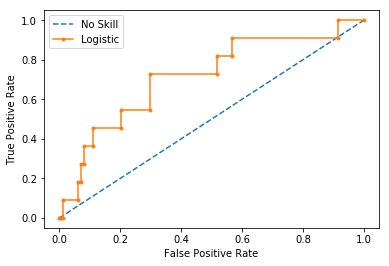

In [3]:
# roc curve and auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.841 auc=0.898


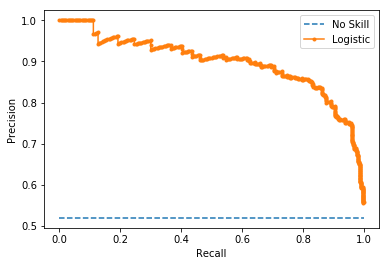

In [4]:
# precision and recall curve

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Applying on different models

In [59]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import numpy as np
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)# generate a no skill prediction (majority class)


#### RandomForest

Text(0.5, 1.0, 'ROC-AUC - Random FOrest')

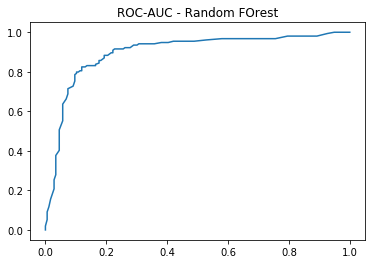

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
roc_auc_score(y_test,y_pred[:,1])
fpr,tpr,thre = roc_curve(y_test,y_pred[:,1])
pyplot.plot(fpr,tpr)
pyplot.title('ROC-AUC - Random FOrest')

Text(0.5, 1.0, 'ROC-AUC - Logistic regression')

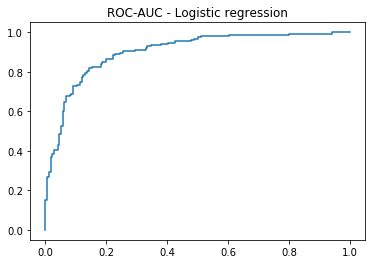

In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)
roc_auc_score(y_test,y_pred[:,1])
fpr,tpr,thre = roc_curve(y_test,y_pred[:,1])
pyplot.plot(fpr,tpr)
pyplot.title('ROC-AUC - Logistic regression')

Text(0.5, 1.0, 'ROC-AUC - Logistic regression')

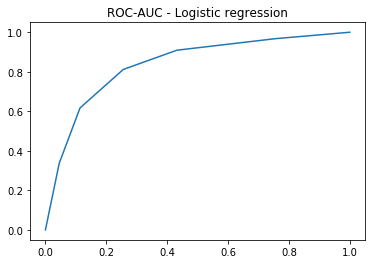

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict_proba(X_test)
roc_auc_score(y_test,y_pred[:,1])
fpr,tpr,thre = roc_curve(y_test,y_pred[:,1])
pyplot.plot(fpr,tpr)
pyplot.title('ROC-AUC - KNN Classifier')

Text(0.5, 1.0, 'ROC-AUC - Adaboost classifier')

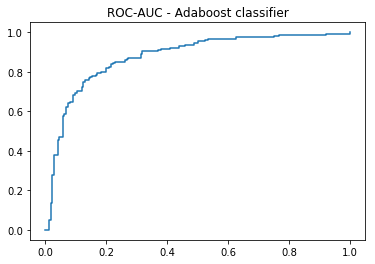

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict_proba(X_test)
roc_auc_score(y_test,y_pred[:,1])
fpr,tpr,thre = roc_curve(y_test,y_pred[:,1])
pyplot.plot(fpr,tpr)
pyplot.title('ROC-AUC - Adaboost classifier')

Text(0.5, 1.0, 'ROC-AUC - XGB classifier')

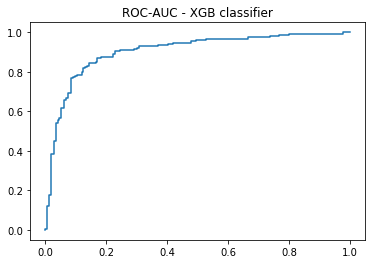

In [84]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict_proba(X_test)
roc_auc_score(y_test,y_pred[:,1])
fpr,tpr,thre = roc_curve(y_test,y_pred[:,1])
pyplot.plot(fpr,tpr)
pyplot.title('ROC-AUC - XGB classifier')

Text(0.5, 1.0, 'ROC-AUC - XGB classifier')

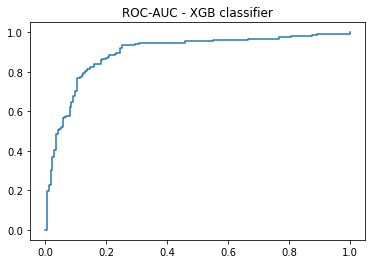

In [102]:
from sklearn.svm import SVC
svc = SVC(    probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict_proba(X_test)
roc_auc_score(y_test,y_pred[:,1])
fpr,tpr,thre = roc_curve(y_test,y_pred[:,1])
pyplot.plot(fpr,tpr)
pyplot.title('ROC-AUC - XGB classifier')

In [53]:
thre.shape

(79,)

In [72]:
thre[np.argmax(tpr - fpr)]
# This threshold gives the best result means, TPR  and FPR diff is max

0.41

Text(0.5, 1.0, 'title')

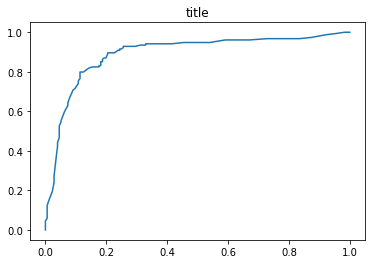

In [71]:
fig = pyplot.figure()
pyplot.plot(fpr,tpr)
pyplot.title('title')


In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Name of the model ------- AUC Score ----------------- Time taken
        KNN             0.8374594155844156               0
        XGB             0.9038149350649352               0
   ADAboost             0.8760330578512397               0
 DecisionTree             0.7857142857142857               0
 RandomForest             0.8947018890200709               0
        SVC             0.8957718417945691               1
 Naive_Bayes             0.8713105076741442               0


Text(0.5, 1.0, 'No of Probabilties for each Model')

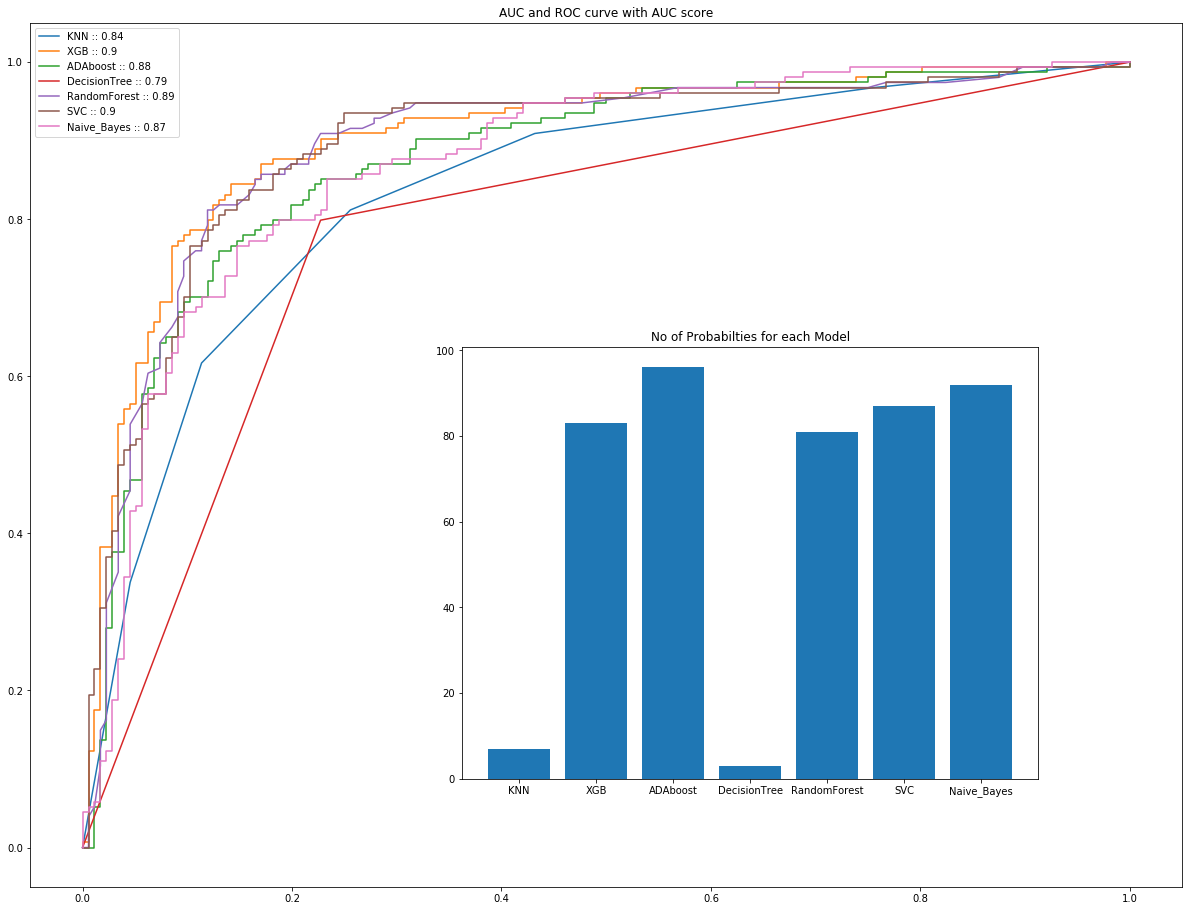

In [227]:
from  datetime import datetime
start_time = int(datetime.now().strftime('%H%M%S'))

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGB',XGBClassifier()))
models.append(('ADAboost',AdaBoostClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('SVC',SVC(probability=True)))
models.append(('Naive_Bayes',GaussianNB()))


import time 


results = []
names = []

print(f'Name of the model ------- AUC Score ----------------- Time taken')


fig = plt.figure(figsize=(20,15))

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]
                   )

plt.title('AUC and ROC curve with AUC score')
ax2 = fig.add_axes([0.4, 0.2, 0.4, 0.4]
                   )


for name, model in models:
    model.fit(X_train,y_train)

    y_pred = model.predict_proba(X_test)

    auc_score = roc_auc_score(y_test,y_pred[:,1])
     
    fpr,tpr,thre = roc_curve(y_test, y_pred[:,1])
    results.append((name,auc_score,fpr,tpr,thre))
    
    
    current_time = int(datetime.now().strftime('%H%M%S'))
    time_taken = current_time - start_time
    start_time = current_time 
    
    print( f' {name:>10} {auc_score:>30} {time_taken:>15}' )
    
    ax1.plot(fpr,tpr)
    


    

    
name_ = [str(i) + ' :: '+ str(np.round(j,2)) for i,j,k,l,m in results]
# plt.legend(f'{name_} : {score_}')
ax1.legend(name_)

d1 = dict([(len(m),i) for i,j,k,l,m in results])
plt.bar(height=d1.keys(), x=d1.values())
plt.title('No of Probabilties for each Model')